# Human PBMCs - Freytag et al. dataset 

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import glob

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

results_file = './write/Freytag_hum_PBMCs_pp.h5ad'

scanpy==1.4.4+40.gbd5f862 anndata==0.6.22.post1 umap==0.3.9 numpy==1.15.4 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
%%R
# Load all the R libraries we will be using in the notebook
library(scran)

## Load 
Here we load the pre-processed datasets (which has been annotated), and the raw matrices (which won't be filtered on the gene level). 

### Raw data

In [4]:
# Set up data loading
file = '../Munich/datasets/human/Freytag_PBMC/GSM3169075_filtered_gene_bc_matrices_h5.h5'
adata_raw = sc.read_10x_h5(filename=file)
adata_raw.X = adata_raw.X.toarray()
adata_raw.var_names_make_unique()
adata_raw.shape

reading ../Munich/datasets/human/Freytag_PBMC/GSM3169075_filtered_gene_bc_matrices_h5.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


(3372, 58302)

In [5]:
adata_raw.obs.head()

""
AAACCTGAGCGTGTCC-1
AAACCTGAGTACACCT-1
AAACCTGAGTGTACGG-1
AAACCTGCATCACAAC-1
AAACCTGGTAAATGAC-1


In [6]:
adata_raw.var.head()

,gene_ids
DDX11L1,ENSG00000223972
WASH7P,ENSG00000227232
MIR6859-1,ENSG00000278267
MIR1302-2HG,ENSG00000243485
MIR1302-2,ENSG00000284332


In [7]:
#Annotate data
adata_raw.obs.index.rename('barcode', inplace=True)

adata_raw.obs['batch'] = ['Freytag']*adata_raw.n_obs
adata_raw.obs['study'] = ['Freytag']*adata_raw.n_obs
adata_raw.obs['chemistry'] = ['v2_10X']*adata_raw.n_obs
adata_raw.obs['tissue'] = ['PBMCs']*adata_raw.n_obs
adata_raw.obs['species'] = ['Human']*adata_raw.n_obs
adata_raw.obs['data_type'] = ['UMI']*adata_raw.n_obs
adata_raw.obs.head()

,batch,study,chemistry,tissue,species,data_type
barcode,,,,,,
AAACCTGAGCGTGTCC-1,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGAGTACACCT-1,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGAGTGTACGG-1,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGCATCACAAC-1,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGGTAAATGAC-1,Freytag,Freytag,v2_10X,PBMCs,Human,UMI


In [8]:
adata_obs = adata_raw.obs.reset_index()
adata_obs['barcode'] = adata_obs['barcode']+['-Freytag']*adata_raw.n_obs
adata_obs.set_index('barcode', inplace = True)
adata_raw.obs = adata_obs
adata_raw.obs.head()

,batch,study,chemistry,tissue,species,data_type
barcode,,,,,,
AAACCTGAGCGTGTCC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGAGTACACCT-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGAGTGTACGG-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGCATCACAAC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI
AAACCTGGTAAATGAC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI


### Pre-processed data

In [9]:
file_paths = '../PBMC_human/write/Freytag_pbmcs.h5ad'
adata_pp = sc.read(file_paths, cache=True)
adata_pp.shape

(3347, 12653)

In [10]:
adata_pp.obs.head()

,n_counts,log_counts,n_genes,mt_frac,size_factors,louvain_r1,louvain1_sub_0,louvain1_sub_0_4,louvain1_sub_0_4_5,final_annotation
index,,,,,,,,,,
AAACCTGAGCGTGTCC-1,5711.0,8.650149,1535,0.051305,1.416843,0,"0,1","0,1","0,1",CD8+ T cells
AAACCTGAGTACACCT-1,2755.0,7.921173,1003,0.022868,0.730255,1,1,1,1,CD4+ T cells
AAACCTGAGTGTACGG-1,2705.0,7.902857,1040,0.048059,0.872122,6,6,6,6,NKT cells
AAACCTGCATCACAAC-1,4474.0,8.406038,1308,0.027939,1.095190,1,1,1,1,CD4+ T cells
AAACCTGGTAAATGAC-1,4372.0,8.382976,1433,0.026304,1.207505,1,1,1,1,CD4+ T cells


In [11]:
adata_obs = adata_pp.obs.reset_index()
adata_obs = adata_obs[['index', 'final_annotation', 'n_counts', 'n_genes', 'mt_frac']].rename(columns = {'index':'barcode'})
adata_obs['barcode'] = adata_obs['barcode']+['-Freytag']*adata_pp.n_obs
adata_obs.set_index('barcode', inplace = True)
adata_pp.obs = adata_obs
adata_pp.obs.head()

,final_annotation,n_counts,n_genes,mt_frac
barcode,,,,
AAACCTGAGCGTGTCC-1-Freytag,CD8+ T cells,5711.0,1535,0.051305
AAACCTGAGTACACCT-1-Freytag,CD4+ T cells,2755.0,1003,0.022868
AAACCTGAGTGTACGG-1-Freytag,NKT cells,2705.0,1040,0.048059
AAACCTGCATCACAAC-1-Freytag,CD4+ T cells,4474.0,1308,0.027939
AAACCTGGTAAATGAC-1-Freytag,CD4+ T cells,4372.0,1433,0.026304


In [12]:
# Restrict to cells that passed QC and were annotated
adata_obs_raw = adata_raw.obs.reset_index()
adata_obs_pp = adata_pp.obs.reset_index()
adata_merged = adata_obs_raw.merge(adata_obs_pp, on='barcode', how='left')
adata_merged.set_index('barcode', inplace = True)
adata_raw.obs = adata_merged
adata_raw.obs.head()

,batch,study,chemistry,tissue,species,data_type,final_annotation,n_counts,n_genes,mt_frac
barcode,,,,,,,,,,
AAACCTGAGCGTGTCC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,CD8+ T cells,5711.0,1535.0,0.051305
AAACCTGAGTACACCT-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,CD4+ T cells,2755.0,1003.0,0.022868
AAACCTGAGTGTACGG-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,NKT cells,2705.0,1040.0,0.048059
AAACCTGCATCACAAC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,CD4+ T cells,4474.0,1308.0,0.027939
AAACCTGGTAAATGAC-1-Freytag,Freytag,Freytag,v2_10X,PBMCs,Human,UMI,CD4+ T cells,4372.0,1433.0,0.026304


In [13]:
adata_raw = adata_raw[~pd.isnull(adata_raw.obs['final_annotation'])]
adata_raw.shape

(3347, 58302)

### Normalization

In [14]:
# Exclude genes that are = 0 in all cells
#Filter genes:
print('Total number of genes: {:d}'.format(adata_raw.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_raw, min_cells=1)
print('Number of genes after cell filter: {:d}'.format(adata_raw.n_vars))

Total number of genes: 58302
filtered out 33726 genes that are detectedin less than 1 cells


Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of genes after cell filter: 24576


In [15]:
#Perform a clustering for scran normalization in clusters
adata_pp = adata_raw.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15, svd_solver='arpack')
sc.pp.neighbors(adata_pp)
sc.tl.louvain(adata_pp, key_added='groups', resolution=0.5)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing PCA with n_comps = 15
    finished (0:00:03)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'groups', the cluster labels (adata.obs, categorical) (0:00:00)


In [16]:
# Check if the minimum number of cells per cluster is < 21:in that case, sizes will be also passed as input to the normalization
adata_pp.obs['groups'].value_counts()

0    805
1    694
2    488
3    424
4    368
5    321
6    231
7     16
Name: groups, dtype: int64

In [17]:
#Preprocess variables for scran normalization
input_groups = adata_pp.obs['groups']
data_mat = adata_raw.X.T
sizes = input_groups.value_counts()

In [18]:
%%R -i data_mat -i input_groups -i sizes -o size_factors

size_factors = computeSumFactors(data_mat, sizes = sizes, clusters=input_groups, min.mean=0.1)

In [19]:
#Delete adata_pp
del adata_pp

... storing 'batch' as categorical
... storing 'study' as categorical
... storing 'chemistry' as categorical
... storing 'tissue' as categorical
... storing 'species' as categorical
... storing 'data_type' as categorical


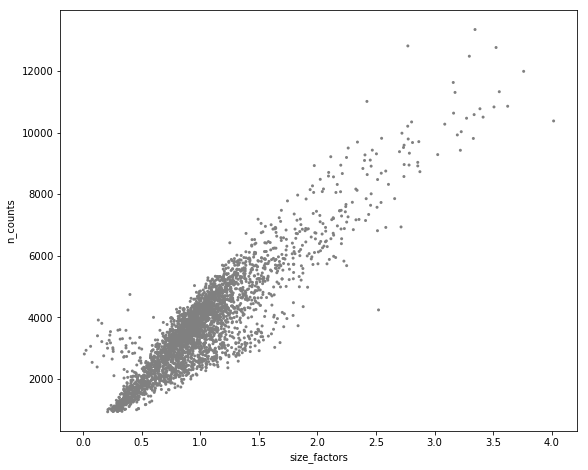

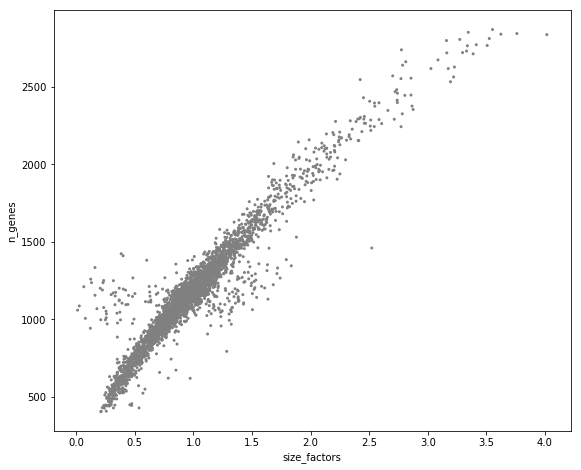

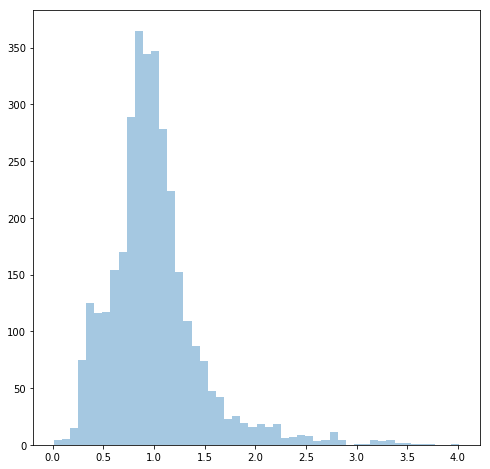

In [20]:
# Visualize the estimated size factors
adata_raw.obs['size_factors'] = size_factors

sc.pl.scatter(adata_raw, 'size_factors', 'n_counts')
sc.pl.scatter(adata_raw, 'size_factors', 'n_genes')

sb.distplot(size_factors, bins=50, kde=False)
plt.show()

In [21]:
#Keep the count data in a counts layer
adata_raw.layers["counts"] = adata_raw.X.copy()

In [22]:
#Normalize adata 
adata_raw.X /= adata_raw.obs['size_factors'].values[:,None]
sc.pp.log1p(adata_raw)

In [23]:
# Save final merged object
adata_raw.write(results_file)